In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Setting the path
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 6\25-May-2023 Germany Rent Analysis'

In [3]:
# Importing the Data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Final_Cleaned.csv'))

Categorical Analysis: Analyze the distribution of categorical variables such as State, Heating_type, TV_offer, Price_trend, Kitchen, Cellar, House_condition, Lift, Flat_type, Garden, District, etc. Calculate the frequency or percentage of each category to understand the prevalence of different options.

In [4]:
cat_vars = ['State', 'Heating_type', 'TV_offer', 'Price_trend', 'Kitchen', 'Cellar', 'House_condition', 'Lift', 'Flat_type', 'Garden', 'District']

In [5]:
for var in cat_vars:
    freq = df[var].value_counts()
    perc = freq / len(df) * 100
    print(f'Frequency and percentage of {var}:') 
    print(pd.concat([freq, perc], axis=1, keys=['Frequency', 'Percentage'])) 
    print()

Frequency and percentage of State:
                        Frequency  Percentage
Nordrhein_Westfalen         34056   23.110122
Sachsen                     33213   22.538069
Sachsen_Anhalt              12598    8.548899
Bayern                      11630    7.892022
Hessen                       8707    5.908499
Baden_Württemberg            7488    5.081295
Berlin                       7356    4.991721
Niedersachsen                7156    4.856003
Thüringen                    4862    3.299313
Brandenburg                  4699    3.188703
Mecklenburg_Vorpommern       4176    2.833799
Schleswig_Holstein           3676    2.494503
Rheinland_Pfalz              3533    2.397465
Hamburg                      2183    1.481366
Bremen                       1520    1.031460
Saarland                      511    0.346760

Frequency and percentage of Heating_type:
                                Frequency  Percentage
central_heating                     73306   49.744849
district_heating                

Rental Price Analysis: Explore the relationship between rental prices (Total_Rent) and other variables. Conduct statistical analysis or visualization techniques to determine how factors like Area(m2), Rooms, Heating_type, Balcony, Newly_built, etc., impact the rental prices.

In [6]:
rent_vars = ['Total_Rent', 'Area(m2)', 'Rooms', 'Heating_type', 'Balcony', 'Newly_built']

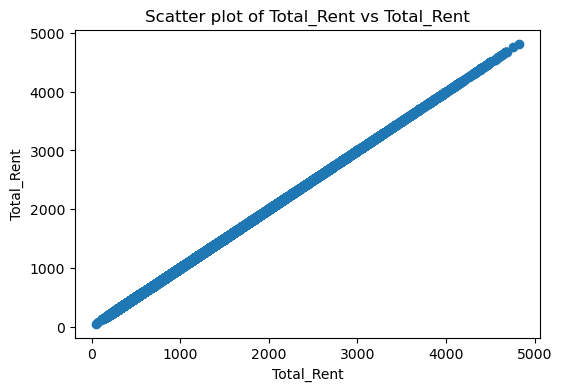

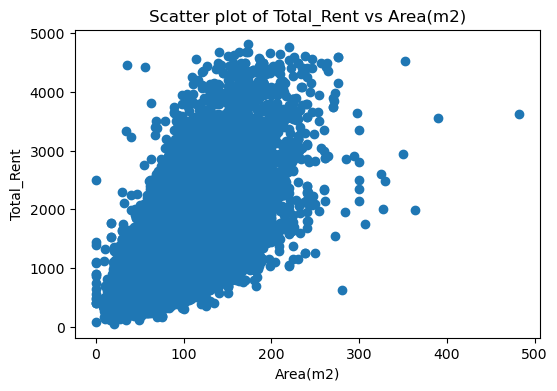

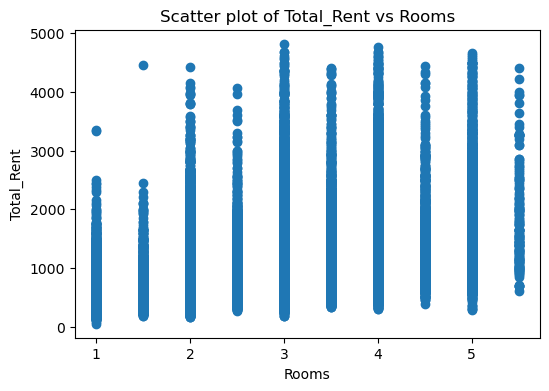

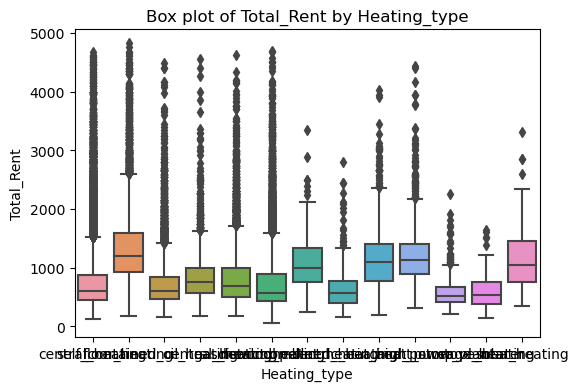

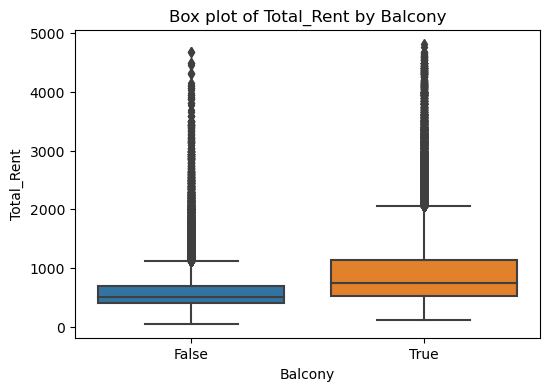

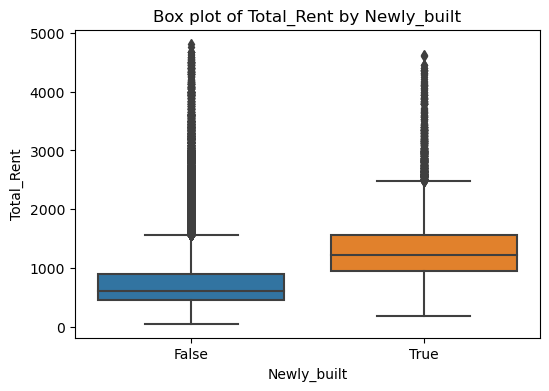

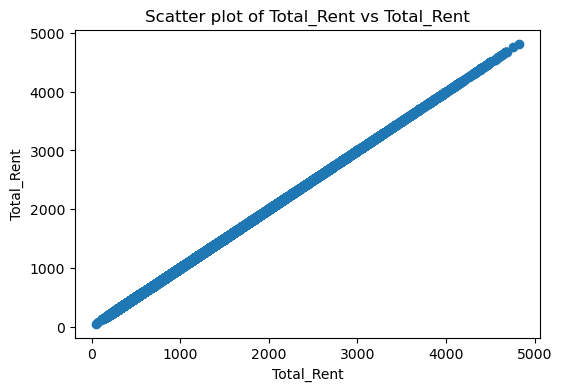

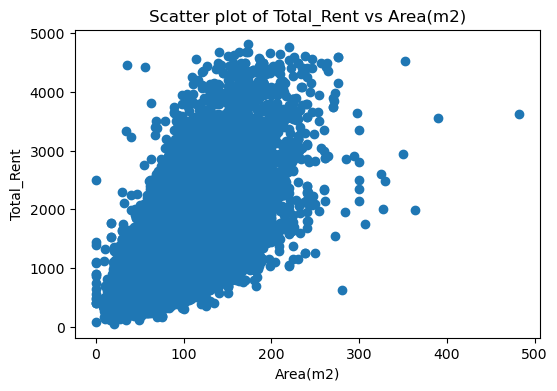

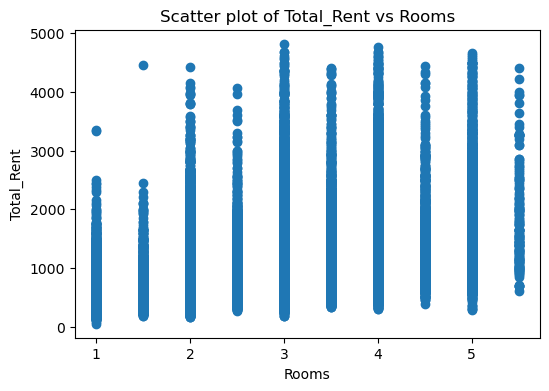

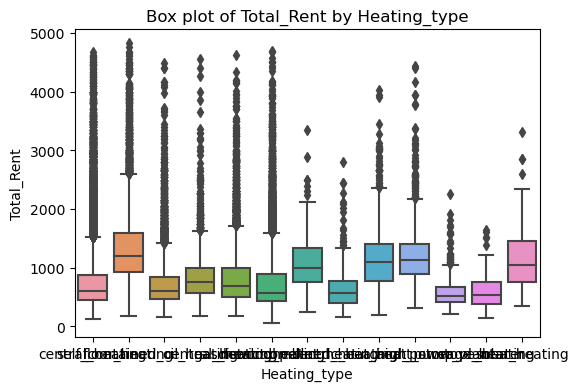

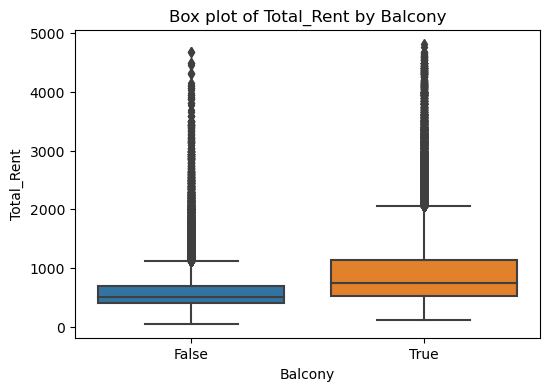

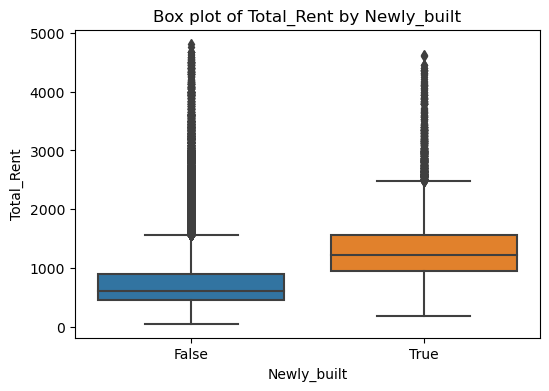

In [14]:
for var in rent_vars:
    if df[var].dtype in ['int64', 'float64']: 
        plt.figure(figsize=(6,4)) 
        plt.scatter(x=df[var], y=df['Total_Rent']) 
        plt.xlabel(var) 
        plt.ylabel('Total_Rent') 
        plt.title(f'Scatter plot of Total_Rent vs {var}') 
        display(plt.gcf()) 
        plt.savefig(os.path.join(path,'04 Analysis', 'Exploratory Visualization', f'scatter_plot_{var}.png'))  # Save the Scatter plot
    
        
    else: 
            plt.figure(figsize=(6,4)) 
            sns.boxplot(x=df[var], y=df['Total_Rent']) 
            plt.xlabel(var) 
            plt.ylabel('Total_Rent') 
            plt.title(f'Box plot of Total_Rent by {var}') 
            display(plt.gcf()) 
            plt.savefig(os.path.join(path,'04 Analysis', 'Exploratory Visualization', f'box_plot_{var}.png'))  # Save the Scatter plot
        

Geographic Analysis: Investigate the distribution of rental properties across different cities (City), districts (District), and ZIP codes (Pincode). Analyze rental prices, property characteristics, or trends based on location to identify potential investment opportunities or market variations.

In [8]:
geo_vars = ['City', 'District', 'Pincode']

In [9]:
for var in geo_vars:
    mean_rent = df.groupby(var)['Total_Rent'].mean()
    median_rent = df.groupby(var)['Total_Rent'].median()
    print(f'Mean and median of Total_Rent by {var}:') 
    print(pd.concat([mean_rent, median_rent], axis=1, keys=['Mean', 'Median'])) 
    print()

Mean and median of Total_Rent by City:
                                Mean   Median
City                                         
Aachen                    863.715385   780.00
Aachen_Kreis              775.836246   715.00
Ahrweiler_Kreis           839.316250   761.25
Aichach_Friedberg_Kreis  1044.697000  1002.00
Alb_Donau_Kreis           915.041250   915.00
...                              ...      ...
Würzburg_Kreis            913.306988   895.00
Zollernalbkreis           793.410294   775.00
Zweibrücken               698.500000   667.50
Zwickau                   483.350481   450.00
Zwickau_Kreis             455.494081   426.80

[419 rows x 2 columns]

Mean and median of Total_Rent by District:
                                Mean   Median
District                                     
Aachen                    863.715385   780.00
Aachen_Kreis              775.836246   715.00
Ahrweiler_Kreis           839.316250   761.25
Aichach_Friedberg_Kreis  1044.697000  1002.00
Alb_Donau_Kreis    

Data Visualization: Utilize charts, graphs, and maps to visualize the data and identify patterns or trends more easily. For example, plot the distribution of property types (Flat_type) or create a heatmap of rental prices across different cities or districts.

In [10]:
viz_vars = ['Flat_type', 'State', 'District']

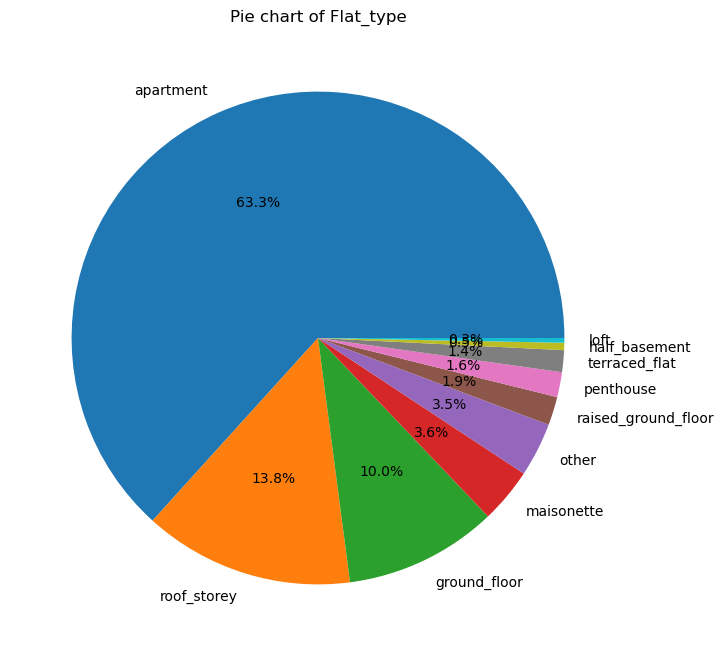

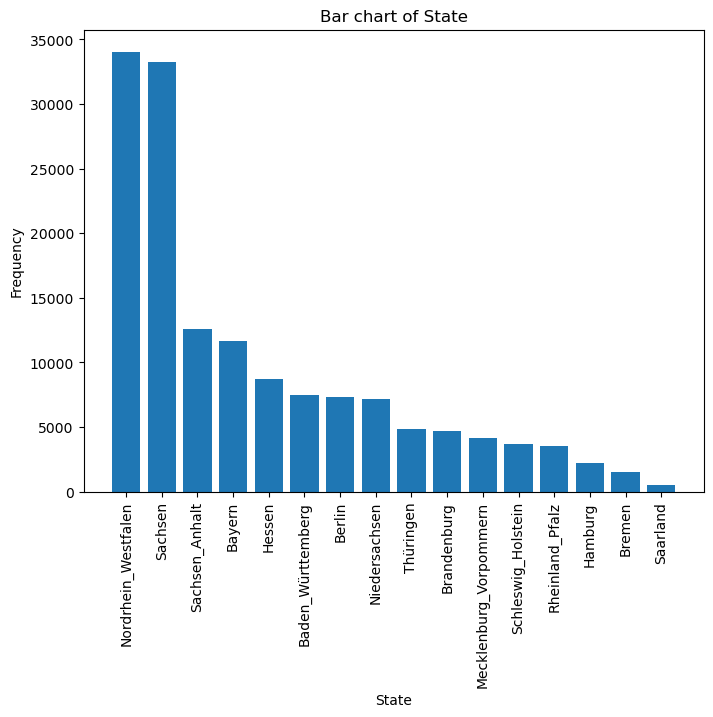

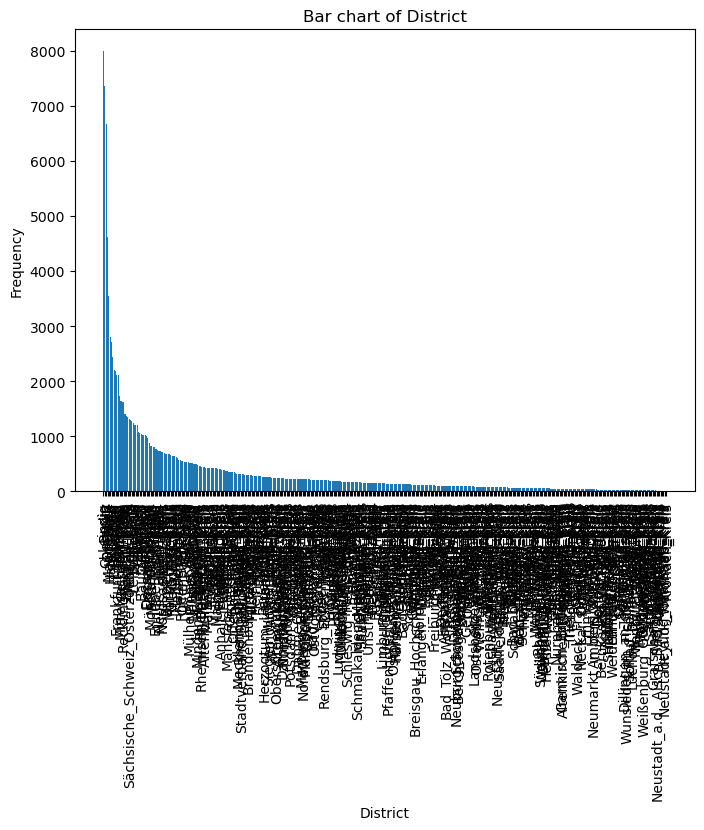

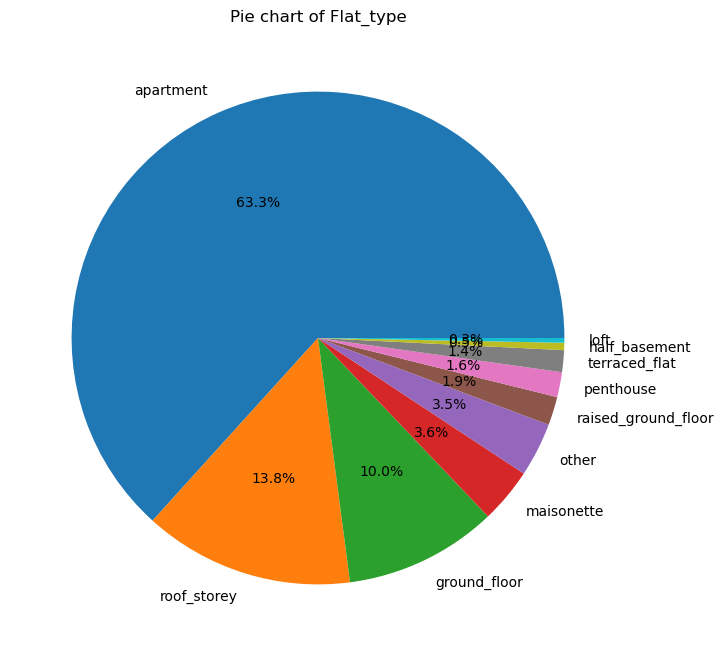

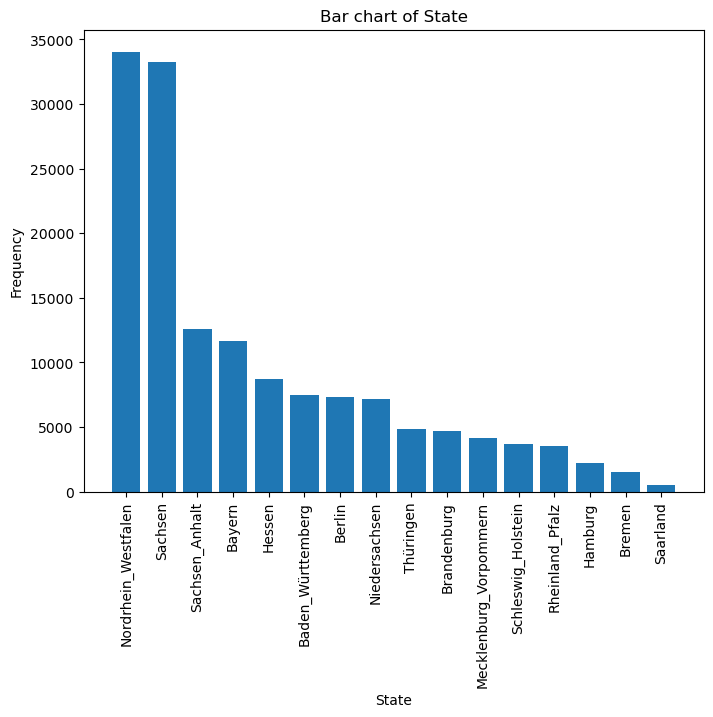

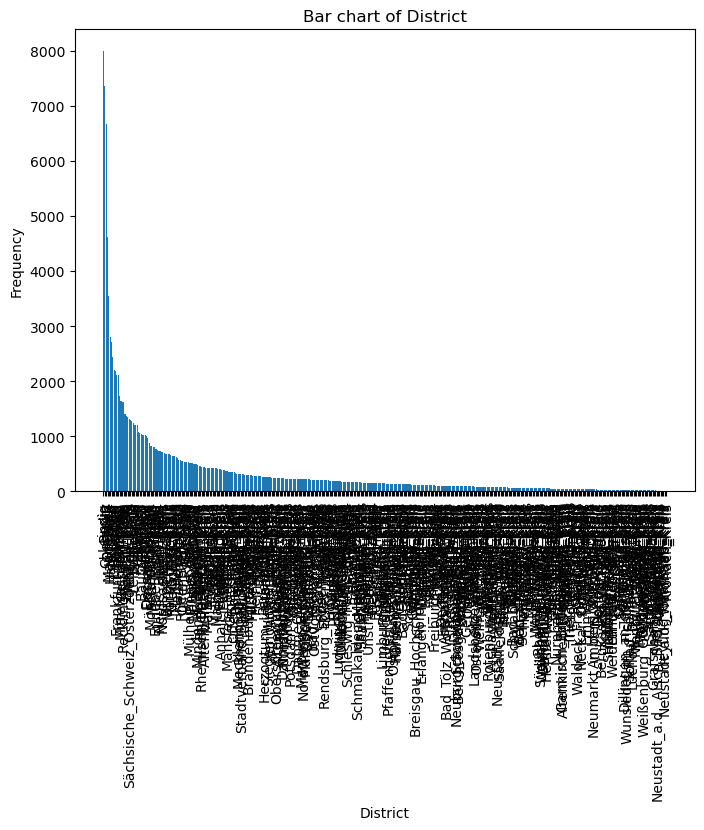

In [15]:
for var in viz_vars:
    freq = df[var].value_counts()
    perc = freq / len(df) * 100
    if len(freq) <= 10: # Plot a pie chart with percentage 
        plt.figure(figsize=(8,8)) 
        plt.pie(perc, labels=perc.index, autopct='%1.1f%%') 
        plt.title(f'Pie chart of {var}') 
        display(plt.gcf())
        plt.savefig(os.path.join(path,'04 Analysis', 'Exploratory Visualization', f'Pie_Chart_{var}.png'))  # Save the pie chart
       
    else: # Plot a bar chart with frequency 
        plt.figure(figsize=(8,6)) 
        plt.bar(x=freq.index, height=freq) 
        plt.xlabel(var) 
        plt.ylabel('Frequency') 
        plt.title(f'Bar chart of {var}') 
        plt.xticks(rotation=90) 
        display(plt.gcf())
        plt.savefig(os.path.join(path,'04 Analysis', 'Exploratory Visualization', f'Bar_Chart_{var}.png'))  # Save the bar chart
       

# Hypothesis:


H1: There is a positive correlation between the area of an apartment and its total rent.


H2: The newly built apartments have a higher total rent than the older ones.


H3: The apartments with a balcony have a higher total rent than those without a balcony.


H4: The apartments with a lift have a higher total rent than those without a lift.


H5: The apartments with a garden have a higher total rent than those without a garden.

H6: The apartments with a kitchen have a higher total rent than those without a kitchen.